<a href="https://colab.research.google.com/github/Sriram-3026/Stock-performance-and-Risk-Analysis/blob/main/Stock_Performance_and_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Downloading Stock data

ticker = ['AAPL','MSFT','GOOGL','AMZN','TSLA']



data = yf.download(ticker, period='1y')['Close']


/tmp/ipython-input-1051245385.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='1y')['Close']
[*********************100%***********************]  5 of 5 completed


In [25]:
# Calculating daily returns
Daily_reuturns = data.pct_change()
print(Daily_reuturns.tail())

Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2026-02-04  0.026013 -0.023594 -0.019634  0.007247 -0.037800
2026-02-05 -0.002098 -0.044208 -0.005375 -0.049542 -0.021674
2026-02-06  0.008010 -0.055548 -0.025328  0.018975  0.034994
2026-02-09 -0.011661 -0.007607  0.004522  0.031061  0.015106
2026-02-10 -0.003423 -0.008432 -0.017699 -0.000798  0.018906


In [32]:
# cumulative metrices

cumulative_return = (1 + Daily_reuturns).cumprod() - 1
total_return_pct = cumulative_return.iloc[-1] * 100

In [35]:
# Risk Analysis

volatility = Daily_reuturns.std() * (252 ** 0.5) * 100
print("Total Return:")
print(total_return_pct.map(lambda x: f"{x:.2f}%"))
print("\nAnnualized Risk (Volatility):")
print(volatility.map(lambda x: f"{x:.2f}%"))

Total Return:
Ticker
AAPL      18.16%
AMZN     -11.08%
GOOGL     72.58%
MSFT       1.19%
TSLA      29.44%
Name: 2026-02-10 00:00:00, dtype: object

Annualized Risk (Volatility):
Ticker
AAPL     31.84%
AMZN     35.23%
GOOGL    30.94%
MSFT     26.36%
TSLA     61.95%
dtype: object


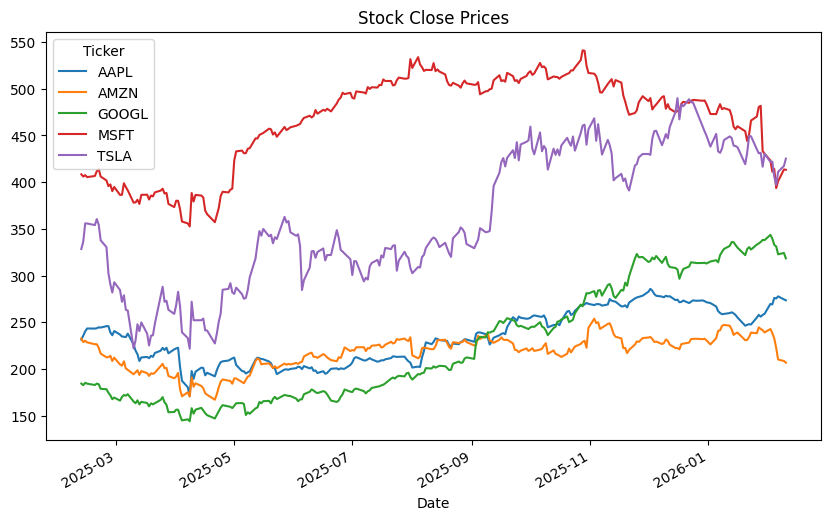

In [37]:
# Visualizing the Returns

data.plot(figsize=(10,6), title='Stock Close Prices')
plt.show()

<BarContainer object of 5 artists>

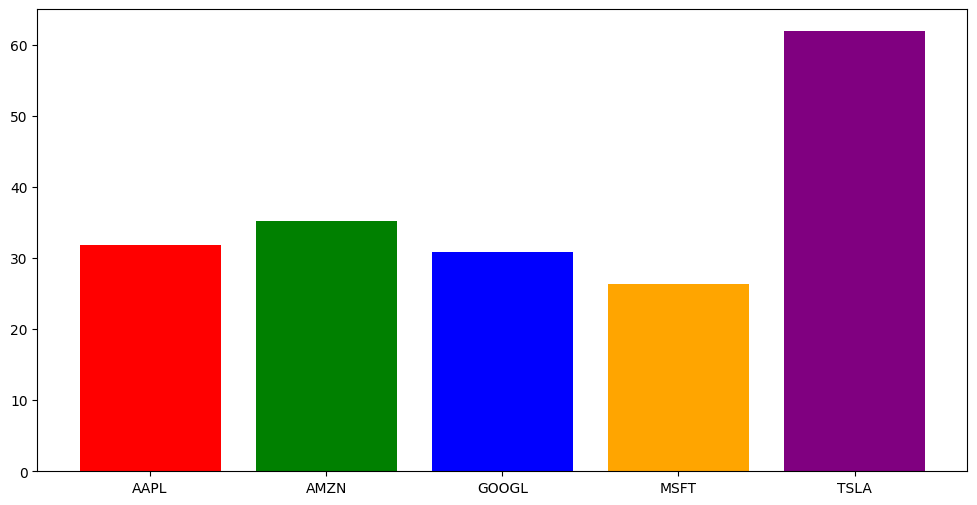

In [41]:
from matplotlib import colors
plt.figure(figsize=(12, 6 ))
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(volatility.index,volatility.values,color=colors)

In [42]:
data.to_csv("Stock_data.csv")

In [43]:
from google.colab import files
files.download("Stock_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>